
# Project: Medical Appointments : Will they show up?

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Here we will investigate the medical data from brazil and dive into the appointment data to gather certain valuable insights. Our Main dependant variable would be the field which will tell us if the patient was a no show.Our independent variables would be if the patient was enrolled in Brazilian welfare program, patient's neighbourhood and the day which appointment was booked.
We can dive into questions like: 
Which day of the week has the highest number of no show appointments?
Which neighbourhood has the best adherence 
Does welfare program really impact the appointment attendance?


In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

rd=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [143]:
rd.head()

rd.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [144]:
rd.shape

(110527, 14)

In [145]:
rd.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [146]:
rd.info()
rd.nunique()
rd.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [147]:
sum(rd.duplicated())


0



### Data Cleaning

#### Based on the above data analysis, The dataset has 14 columns and 110527 rows. The data type for the following fields need to be changed : 
#### Patientid (to integer64), Scheduledday & Appointmentday (to Date Time format) 
#### Data has no null values
#### In the descriptive section we notice the minimum for age is -1 which needs to be corrected, 
#### Handcap has 5 different values with a max of 4 


#### We need to rectify the following in the data :
    1. Change Datatype for patientid, scheduleday & Appointmentday
    2. And calculate the Scheduled hour using the Lambda function

In [148]:
rd['ScheduledDay'] = pd.to_datetime(rd['ScheduledDay'])
rd['scheduled_hour'] = (rd.ScheduledDay.apply(lambda x : x.hour))
rd['ScheduledDay'] = rd.ScheduledDay.dt.date
rd['AppointmentDay'] = pd.to_datetime(rd['AppointmentDay']).dt.date
rd['Dayofweek'] = pd.to_datetime(rd['AppointmentDay']).dt.weekday_name
rd['PatientId'] = rd['PatientId'].astype('int64')
rd.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,scheduled_hour,Dayofweek
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18,Friday
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16,Friday
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,16,Friday
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17,Friday
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16,Friday


Lets Define a function to group Age into buckets and Days before appointment so that it is for easier analysis in the latter part

In [149]:
def ageGroup(x):
    if x < 18:
        return "Children"
    elif x >= 18 and x <= 35:
        return "Young Adult"
    elif x > 35 and x <= 64:
        return "Older Adult"
    else:
        return "Senior Citizen"

rd['AgeGroup'] = rd['Age'].apply(ageGroup)

rd.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,scheduled_hour,Dayofweek,AgeGroup
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18,Friday,Older Adult
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16,Friday,Older Adult
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,16,Friday,Older Adult
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17,Friday,Children
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16,Friday,Older Adult


    2. Filter out Age & handcap which have not been populated with the right values
    # We calculate the days before Appointment & We will also filter our data for relevabt columns

In [150]:
rd_filter1 = rd.query('Age > 0')
rd_filter2 = rd_filter1.query('Handcap < 2')
rd_filter2.dtypes
rd_filter2['Days']=rd_filter2['AppointmentDay']-rd_filter2['ScheduledDay']
rd_filter2.head()
rd_filter2.nunique()

df=rd_filter2.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis=1)
df.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,scheduled_hour,Dayofweek,AgeGroup,Days
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18,Friday,Older Adult,0 days
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16,Friday,Older Adult,0 days
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,16,Friday,Older Adult,0 days
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17,Friday,Children,0 days
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16,Friday,Older Adult,0 days


3. We combine the different symptoms indicated here to be able to use it as an indicator for further analysis

In [151]:
df['Noshow'] = df['No-show'].replace({'No':1,'Yes':0})

df['Symptom'] = df['Hipertension']+df['Diabetes']+df['Alcoholism']+df['Handcap']

df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,scheduled_hour,Dayofweek,AgeGroup,Days,Noshow,Symptom
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18,Friday,Older Adult,0 days,1,1
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16,Friday,Older Adult,0 days,1,0
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,16,Friday,Older Adult,0 days,1,0
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17,Friday,Children,0 days,1,0
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16,Friday,Older Adult,0 days,1,2


A histogram to understand the distribution or any outliers that need to be removed

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab00e60b00>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7faaf6aed390>]], dtype=object)

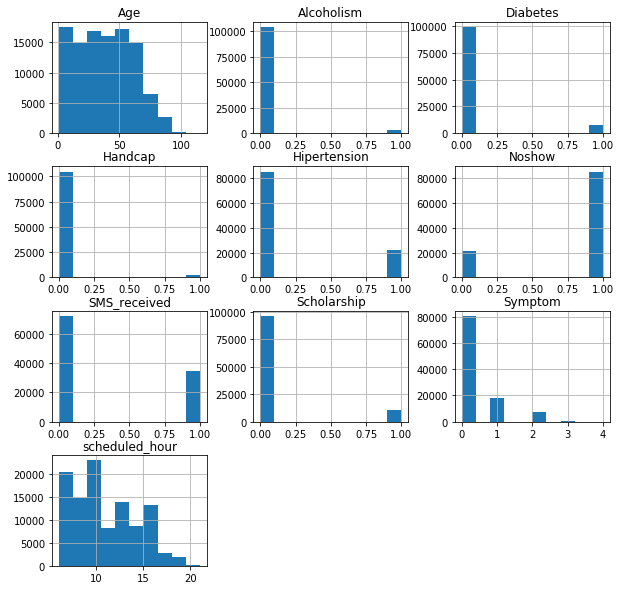

In [152]:
df.hist(figsize=(10,10))

<a id='eda'></a>
## Exploratory Data Analysis


### Do Age, Gender, Symptoms or Scolarship play a significant role in No-Show Appointments?

In [126]:
df.head()
Show = df.Noshow == True
NoShow = df.Noshow == False


#### Here we separate the data into two arrays with Noshow = 1 ( .i.e No as a success = showed up for the appointment ) & Noshow = 0 (.i.e Yes as a failure = did not show up for the appointment ) 

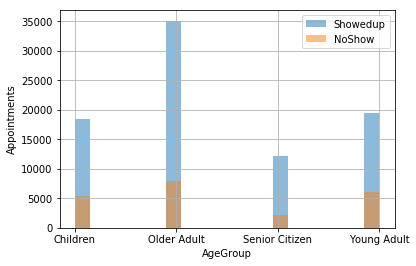

In [112]:
df.AgeGroup[Show].hist(alpha = 0.5, bins=20, label = 'Showedup')
df.AgeGroup[NoShow].hist(alpha = 0.5, bins=20 , label = 'NoShow')
plt.legend();
plt.xlabel('AgeGroup')
plt.ylabel('Appointments');

##### In the above chart we observe the following : Age has been divided into four buckets : 1. Children < 18 years : Medium probablity of showing up, 2. 18 - 35 : Young Adults seem to have the lowest Adherence. 3. Older Adults (40 - 60 ) & Senior Citizens have the highest adherence to show up for the appointment .

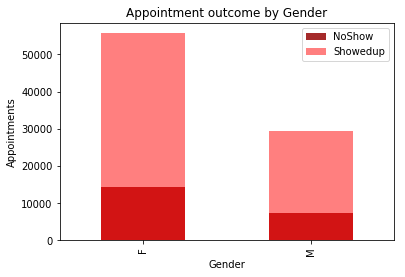

In [48]:
df.Gender[NoShow].value_counts().plot(title='Appointment outcome by Gender',kind='bar',alpha = 1,color ='brown', label ='NoShow')
df.Gender[Show].value_counts().plot(kind='bar',alpha =0.5,color ='red', label ='Showedup')
plt.legend()
plt.xlabel('Gender')
plt.ylabel('Appointments');


#### Above chart shows that gender does not affect the patient's decision to show up for the appointment. Ratio is quite similar to both Male & Female which is close to 20%

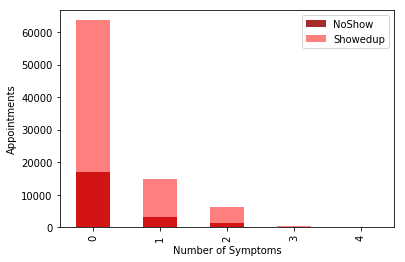

In [49]:
df.Symptom[NoShow].value_counts().plot(kind='bar',alpha = 1,color ='brown', label ='NoShow')
df.Symptom[Show].value_counts().plot(kind='bar',alpha =0.5,color ='red', label ='Showedup')
plt.legend();
plt.xlabel('Number of Symptoms')
plt.ylabel('Appointments');


#### Above Chart Number of Symptoms are directly correlated to chances of patient showing up for the appointment.

We will now investigate the Text Message Alerts which i have shown particularly because of surprising information.

Seems like sending SMS is not at all helping the no show rate.

Below is a mean plot to investigate the same

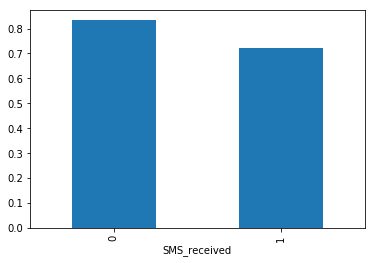

In [115]:
df.groupby('SMS_received').Noshow.mean().plot(kind='bar')

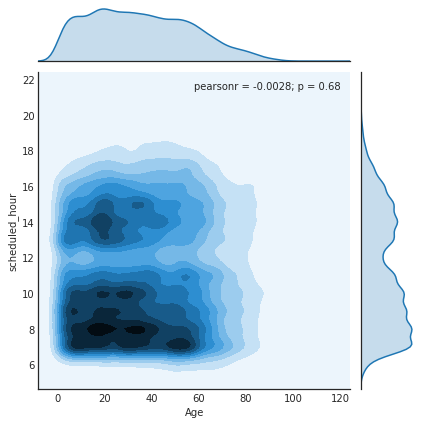

In [139]:
with sns.axes_style('white'):
    sns.jointplot("Age", "scheduled_hour", df[NoShow], kind='kde')

The Density Plot above tells us that the Majority of Noshow appointments are concentrated in the Age Groups 18 - 40 in the morning between 6 to 10 AM and the other mojor chunk is between 2pm to 3pm in the Afternoon

### Exploring into Neighbourhood , Days to Appointment and the Day of the week

In [166]:
df['Days'] = df['Days'] / np.timedelta64(1, 'D')

In [172]:
def Daysgroup(x):
    if x == 0:
        return "Same Day"
    elif x >= 1 and x <= 2:
        return "1 - 2 Days"
    elif x >= 3 and x <= 7:
        return "3 - 7 Days"
    elif x >= 8 and x <= 31:
        return "8 - 31 Days"
    else:
        return "> a month"  

df['Daygroup'] = df['Days'].apply(Daysgroup)


From Above we have converted the lead days to Appointment to the Groups Same Day & So - on

In [173]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,scheduled_hour,Dayofweek,AgeGroup,Days,Noshow,Symptom,Daygroup
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18,Friday,Older Adult,0.0,1,1,Same Day
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16,Friday,Older Adult,0.0,1,0,Same Day
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,16,Friday,Older Adult,0.0,1,0,Same Day
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17,Friday,Children,0.0,1,0,Same Day
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16,Friday,Older Adult,0.0,1,2,Same Day


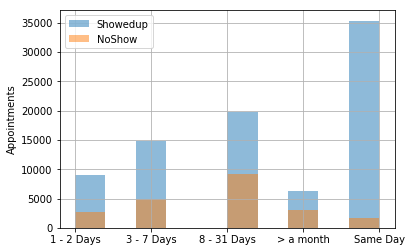

In [190]:
df.Daygroup[Show].hist(alpha = 0.5, label = 'Showedup')
df.Daygroup[NoShow].hist(alpha = 0.5, label = 'NoShow')
plt.ylabel('Appointments');
plt.legend();

As we can see above the majority of the appointments are under the Same-Day Bracket and 
most of the % of no show appointments increases gradually as the lead time to appointment increases

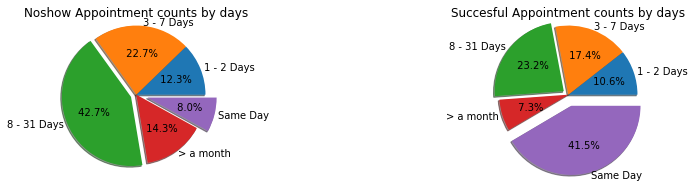

In [246]:
pie_data = df.Daygroup[NoShow].value_counts().sort_index()
pie_data2 = df.Daygroup[Show].value_counts().sort_index()
label_list = pie_data.index
sizes = pie_data
sizes2 = pie_data2
explode_list = (0, 0, 0.1, 0, 0.2) 
fig = plt.figure()

ax = fig.add_axes([0, 0, .5, .5], aspect=1)
ax2 = fig.add_axes([1, .0, .5, .5], aspect=1)


ax.pie(sizes, explode = explode_list, labels = label_list, autopct =' %1.1f%%',
    pctdistance = 0.6, labeldistance = 1.05, shadow = True, startangle = 0,radius = 1.2)
ax.set_title('Noshow Appointment counts by days')
ax2.pie(sizes2, explode = explode_list, labels = label_list, autopct =' %1.1f%%',
    pctdistance = 0.6, labeldistance = 1.05, shadow = True, startangle = 0,radius = 1.2)
ax2.set_title('Succesful Appointment counts by days')

plt.show()

Above Chart clearly shows the distribution of Noshow & Succesful appointments and we can see that appointments on the same day tend to be succesful and has the least amount of Noshow and the Highest no show can be observed within ppl having appointments in 8 to 31 days

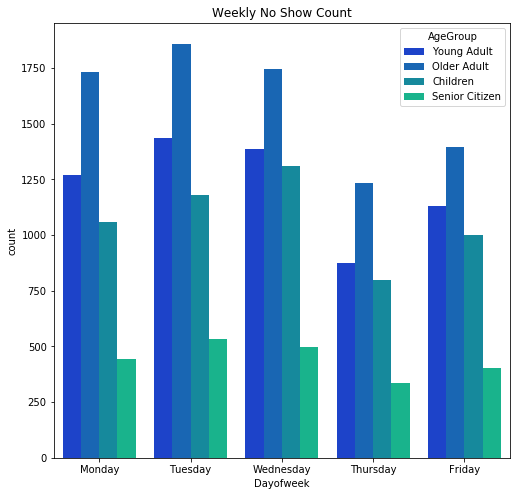

In [244]:

figure = plt.figure(figsize=(18,8))
ax = figure.add_subplot(1,2,1)
ax.set_title("Weekly No Show Count")
sns.countplot(x="Dayofweek",hue="AgeGroup",data=df[NoShow],palette='winter',ax=ax,order=['Monday','Tuesday','Wednesday','Thursday','Friday'])
ax

Above Chart shows which Age Group has tendency to not show up on which of the days of the week, This can also be shown by Gender

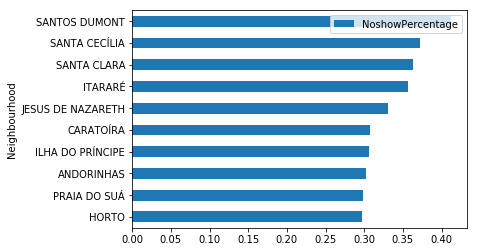

In [270]:
ck = (df.Neighbourhood[NoShow].value_counts()/df.Neighbourhood[Show].value_counts())

ck_2=pd.DataFrame({'Neighbourhood':ck.index, 'NoshowPercentage':ck.values})

ck_2 = ck_2.sort_values(by=['NoshowPercentage'], ascending = False)

ck_3 = ck_2.head(10)

ck_3.sort_values(by=['NoshowPercentage']).plot.barh(x='Neighbourhood', y='NoshowPercentage')



<a id='conclusions'></a>
## Conclusions

> Based on the research questions, We were able to uncover some interesting findings from the dataset :
1. Gender does not affect the patient's decision to show up for the appointment. Ratio is quite similar to both Male & Female
2. Age is inversely correlated with the Appointment show up meaning older the patient more likely the patient wont show up for the appointment.The percentage of no show starts to increase after 60 years of Age
3. Number of Symptons are directly correlated to chances of patient showing up for the appointment.
4. if SMS is received it is less likely for the patient to show up

>Based on the second research question we deep dove into the time difference between appointment booking and appointment
1. Most Importantly, if the patient calls up for an appointment on the same day he has a high rate to show up for the appointment and as the gap increases the chances start to decrease. If the appointment is booked within Within a week or a month they have high chances of a noshow

2. We also concluded that Thursdays has the lowest number of No Show appointments and Tuesday seem to be the Highest with a downward trend and a spike in Fridays

3. The Top 10 neighbourhoods with highest no show rates are calculated above & shown below :
    SANTOS DUMONT
    SANTA CECÍLIA
    SANTA CLARA
    ITARARÉ
    JESUS DE NAZARETH
    CARATOÍRA
    ILHA DO PRÍNCIPE
    ANDORINHAS
    PRAIA DO SU
    HORTO
    
### Limitations of the dataset  

Although 
In the descriptive section we notice the minimum for age is -1 & 0 which needs to be corrected or confirmed with the data owner.
A sizable chunk of the observations are falling under the age group 0 & less than 1

Handcap has 5 different values with a max of 4

The data set contains a lot of information that will  help predict whether a patient is going to show up to an appointment and will be helped by using a bigger data set spanning a longer period of time.

The data for Symptoms is relatively sparse compared to other parameters and any insights that we derive might be skewed.

Data has a large chunk of children and Young adults so demographics need to be considered wisely




In [20]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0